# Question 6 Figure 3e

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from pathlib import Path

DATA_DIR = Path.home()/Path('shared/climate-data')
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc") 
co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"

data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19


In [2]:
#monterey latitude and longitude converted from kelvins to celcius split over 31 days/month
monterey_ds = ds.analysed_sst.sel(lat = 36, lon = -138.8947, method = 'nearest') - 273.15
monterey_ds = monterey_ds.rolling(time = 31, center = True).mean()

#calculating mean and standard deviation for fill_between gray later 
mean_sst = monterey_ds.sel(time = slice('2002', '2013')).groupby('time.dayofyear').mean()
std_sst = monterey_ds.sel(time = slice('2002', '2013')).groupby('time.dayofyear').std()
max_sst = monterey_ds.sel(time = slice('2002', '2013')).groupby('time.dayofyear').max()
min_sst = monterey_ds.sel(time = slice('2002', '2013')).groupby('time.dayofyear').min()

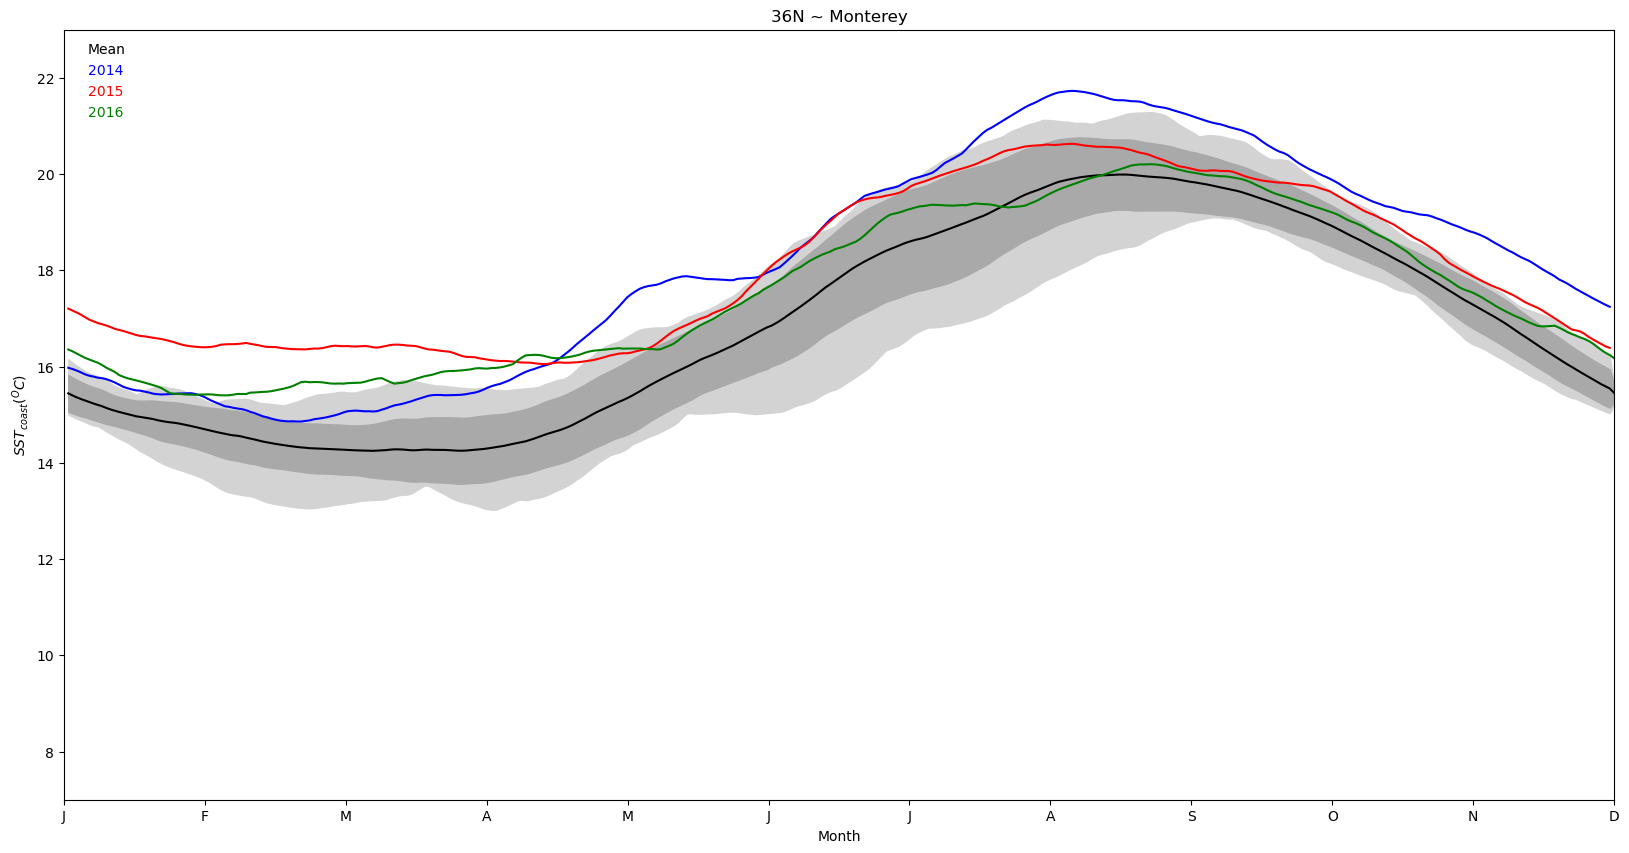

In [4]:
figure, ax = plt.subplots(figsize=(20,10))


ax.plot(mean_sst.dayofyear, mean_sst, color='black', label='Mean')

#iterate over the mean of sst over the 3 years, differentiated by color 
years = ['2014','2015','2016']
colors = ['blue', 'red','green']
for x in np.arange(3):
    monterey_ds.sel(time = years[x]).groupby('time.dayofyear').mean().plot(color = colors[x], label = years[x])

#fill the gray area between 1 std between the mean sst 
ax.fill_between(max_sst.dayofyear, max_sst, min_sst, color = 'lightgrey')
ax.fill_between(mean_sst.dayofyear, mean_sst + std_sst, mean_sst - std_sst, color = 'darkgrey')

#label the graph with legend, setting x-axis and y-axis 
ax.set_title('36N ~ Monterey' )
ax.set_ylabel('$SST_{coast} (^{O}C)$')
ax.set_xlabel('Month')
ax.set_xticks(ticks = np.linspace(0, 366, 12), labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_ylim(7, 23)
ax.set_xlim(0, 366)
plt.legend(loc = 2, labelcolor = 'linecolor', handlelength = 0, frameon = False)
plt.show()